In [ ]:
# Seaborn 단계별 예시 및 활용
# Seaborn은 Matplotlib을 기반으로 하며, 아름답고 정보가 풍부한 통계 그래프를 쉽게 그릴 수 있도록 설계된 Python 라이브러리입니다.

# Seaborn을 써야 하는 경우
# 통계적 관계 및 분포 시각화: 데이터의 분포, 독립변수와 종속변수 간의 복잡한 통계적 관계를 명확하게 보여줄 때.
# 간결성: 복잡한 그래프(예: 바이올린 플롯, 쌍별 산점도)를 Matplotlib보다 훨씬 적은 코드로 구현할 때.
# 미적 요소: 기본적으로 Matplotlib보다 더 세련되고 전문적인 디자인의 그래프를 원할 때.


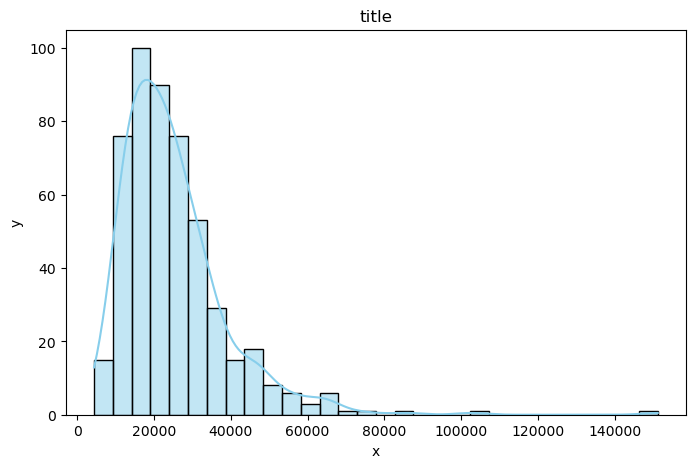

In [2]:
단일 변수 분포 확인 (Histogram & KDE)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#-------------------------------------------------------
# 1. 데이터 준비
#-------------------------------------------------------
np.random.seed(42)
data_income = np.random.lognormal(mean=10, sigma=0.5, size=500) # 로그정규분포 소득 데이터

df = pd.DataFrame({'Income': data_income})

#-------------------------------------------------------
# 2. 분포 시각화 (Histplot + KDE)
#-------------------------------------------------------
plt.figure(figsize=(8, 5))
# kde=True로 밀도 곡선 추가, bins=30으로 막대 개수 지정
sns.histplot(data=df, x='Income', bins=30, kde=True, color='skyblue') 

#-------------------------------------------------------
# 3. 제목 및 출력
#-------------------------------------------------------
plt.title('title') # 소득 분포 (Histogram with KDE)
plt.xlabel('x') # 소득
plt.ylabel('y') # 빈도
plt.show()


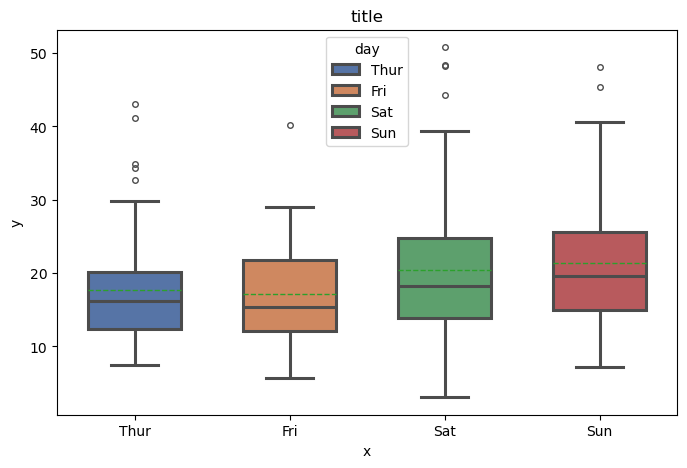

In [5]:
# 범주형 vs. 수치형 관계 확인 (Box Plot)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#-------------------------------------------------------
# 1. 예제 데이터 로드 (팁 데이터셋 사용)
#-------------------------------------------------------
# Seaborn에 내장된 유명한 '팁' 데이터셋 로드
df_tips = sns.load_dataset("tips") 
df_tips
#-------------------------------------------------------
# 2. 박스 플롯 그리기
#-------------------------------------------------------
plt.figure(figsize=(8, 5))
# x='day'(범주형, 독립변수), y='total_bill'(수치형, 종속변수)
sns.boxplot(
    x="day",              # x축에 사용할 변수 (범주형, 예: 요일)
    y="total_bill",       # y축에 사용할 변수 (수치형, 예: 총 금액)
    data=df_tips,         # 사용할 데이터프레임 지정
    hue="day",            # 색상 그룹을 나눌 기준 변수 (x와 같으면 막대별 색상 구분)
    palette="deep",     # 색상 팔레트 설정 (예: "deep", "muted", "bright", "pastel", "dark", "colorblind" 등)
    legend=True,          # 범례 표시 여부 (True=표시, False=숨김)
    width=0.6,            # 박스 너비 (기본 0.8, 좁히거나 넓힐 수 있음)
    linewidth=2.2,        # 박스 테두리 두께 설정
    fliersize=4,          # 이상치(outlier) 점의 크기 조절
    orient="v",           # 박스 방향 ('v'=세로, 'h'=가로)
    showmeans=True,       # 평균값 표시 여부
    meanline=True,        # 평균을 선으로 표시할지 여부
    notch=False,          # 노치(중앙값 신뢰구간 표시) 여부
    saturation=0.8        # 색상 채도 (0~1, 낮을수록 옅어짐)
)

#-------------------------------------------------------
# 3. 제목 및 출력
#-------------------------------------------------------
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


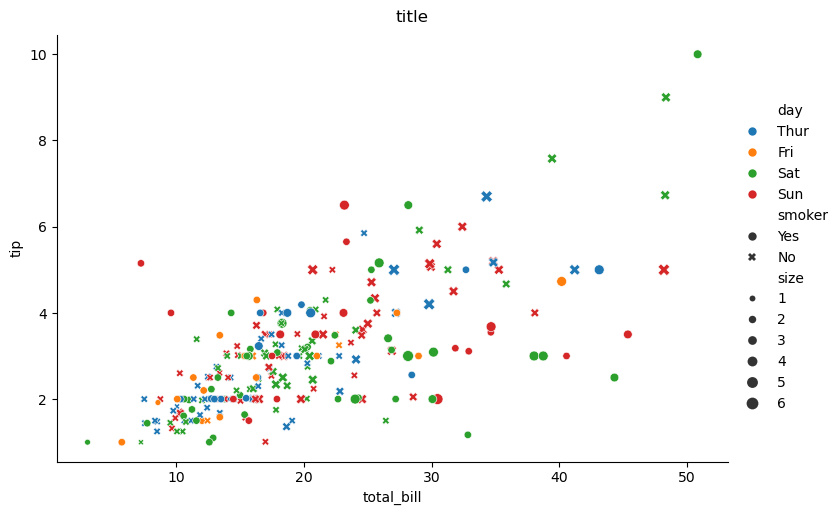

In [11]:
# 두 수치형 변수 관계 확인 (Relplot / Scatter Plot)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#-------------------------------------------------------
# 1. 예제 데이터 로드 (팁 데이터셋 재사용)
#-------------------------------------------------------
df_tips = sns.load_dataset("tips") 

#-------------------------------------------------------
# 2. 산점도 및 관계 분석 (Relplot)
#-------------------------------------------------------
# x='total_bill', y='tip' 두 수치형 관계에 'time' (점심/저녁)을 색상(hue)으로 추가
sns.relplot(
    data=df_tips,
    x="total_bill", y="tip",
    hue="day",     # 색상구분 기준 변수
    style="smoker", # '흡연 여부'에 따라 마커 스타일 변경
    size="size",    # '테이블 인원'에 따라 마커 크기 변경
    height=5, aspect=1.5
) 

#-------------------------------------------------------
# 3. 제목 및 출력
#-------------------------------------------------------
plt.suptitle('title', y=1.02) 
plt.show()


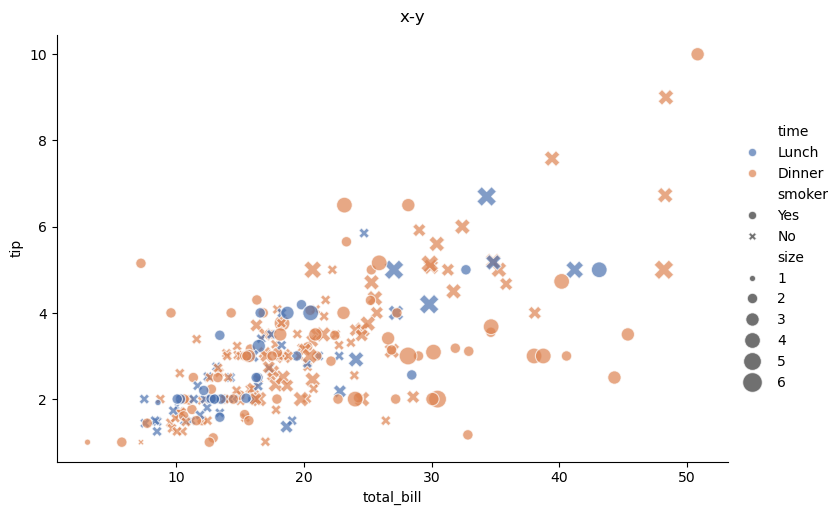

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#-------------------------------------------------------
# 1. 예제 데이터 로드 (Seaborn 내장 tips 데이터)
#-------------------------------------------------------
df_tips = sns.load_dataset("tips") 

#-------------------------------------------------------
# 2. 산점도 및 관계 분석 (Relplot)
#-------------------------------------------------------
sns.relplot(
    data=df_tips,          # 사용할 DataFrame
    x="total_bill",        # X축 변수 (수치형)
    y="tip",               # Y축 변수 (수치형)
    hue="time",            # 색상 구분 기준 변수 ('Lunch' / 'Dinner')
    style="smoker",        # 마커 모양 구분 기준 ('Yes' / 'No')
    size="size",           # 점의 크기 구분 기준 (인원 수)
    col=None,              # 열 방향으로 여러 subplot 나누기
    row=None,              # 행 방향으로 여러 subplot 나누기
    kind="scatter",        # 그래프 종류 ('scatter' 또는 'line')
    palette="deep",        # 색상 팔레트 ('pastel', 'muted', 'bright', 등)
    sizes=(20, 200),       # 점 크기 범위 (최소, 최대)
    alpha=0.7,             # 점 투명도 (0~1)
    marker="o",            # 기본 마커 형태 ('o', 's', '^' 등)
    edgecolor="white",     # 점 테두리 색상
    linewidth=0.8,         # 점 테두리 두께
    legend="auto",         # 범례 자동 표시 ('brief', 'full', False)
    height=5,              # 전체 figure 높이 (inch 단위)
    aspect=1.5,            # 가로/세로 비율
    facet_kws=None,        # FacetGrid 관련 세부 옵션(dict)
    hue_order=None,        # 색상 순서 지정 (리스트 형태)
    style_order=None,      # 스타일 순서 지정 (리스트 형태)
    size_order=None        # 크기 순서 지정 (리스트 형태)
)

#-------------------------------------------------------
# 3. 제목 및 출력
#-------------------------------------------------------
plt.suptitle('x-y', y=1.02) 
plt.show()

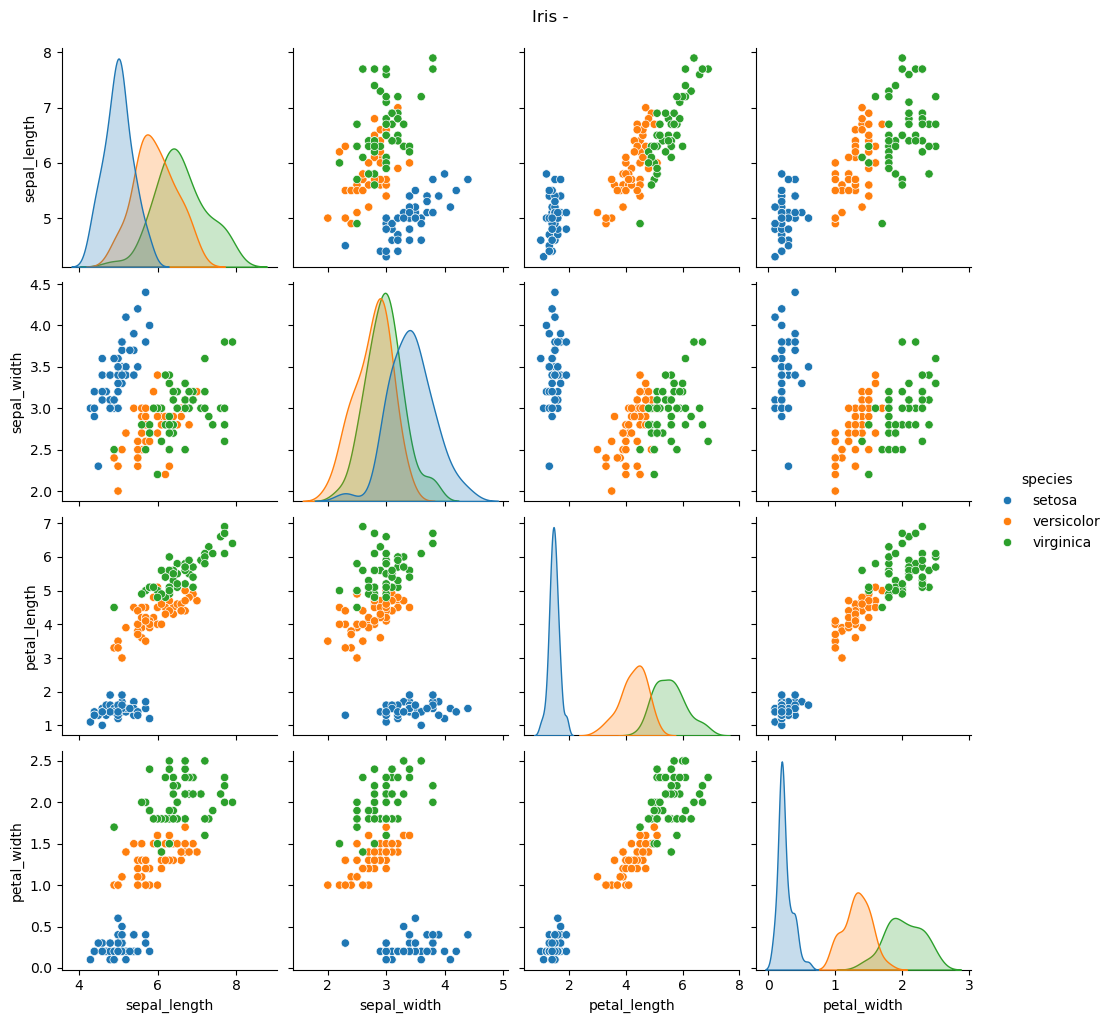

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#-------------------------------------------------------
# 1. 예제 데이터 로드 (붓꽃 데이터셋 사용)
#-------------------------------------------------------
df_iris = sns.load_dataset("iris") 

#-------------------------------------------------------
# 2. Pair Plot 그리기
#-------------------------------------------------------
# 4개의 수치형 변수(꽃받침/꽃잎 길이/너비) 간의 관계를 한 번에 시각화
# hue='species'를 통해 종(범주형)별로 색상을 구분하여 표시
sns.pairplot(df_iris, hue="species", diag_kind="kde")

#-------------------------------------------------------
# 3. 출력
#-------------------------------------------------------
plt.suptitle('Iris -', y=1.02)
plt.show()